**Review**

Hi, my name is Dmitry and I will be reviewing your project.
  
You can find my comments in colored markdown cells:
  
<div class="alert alert-success">
  If everything is done successfully.
</div>
  
<div class="alert alert-warning">
  If I have some (optional) suggestions, or questions to think about, or general comments.
</div>
  
<div class="alert alert-danger">
  If a section requires some corrections. Work can't be accepted with red comments.
</div>
  
Please don't remove my comments, as it will make further review iterations much harder for me.
  
Feel free to reply to my comments or ask questions using the following template:
  
<div class="alert alert-info">
  For your comments and questions.
</div>
  
First of all, thank you for turning in the project! You did a pretty good job overall, but there are a few problems that need to be fixed before the project is accepted. Let me know if you have questions!

# Integrated Project 2

Gold ore mining

3 datasets: train, test, source (included train and test set)

Tasks: 
* EDA
* clean data
* Build multiple ML models (two targets) and determine the best model based on the final sMAPE. 
* Test this model with the test set. 

## EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error




In [2]:
# read in datasets
df_train = pd.read_csv('/datasets/gold_recovery_train.csv')
df_test = pd.read_csv('/datasets/gold_recovery_test.csv')
df_source = pd.read_csv('/datasets/gold_recovery_full.csv')

### review data

In [3]:
print(df_train.duplicated().sum())
display(df_train.isna().sum())
display(df_train.info())
df_train.sample(5)
df_train.shape

0


date                                            0
final.output.concentrate_ag                    72
final.output.concentrate_pb                    72
final.output.concentrate_sol                  370
final.output.concentrate_au                    71
                                             ... 
secondary_cleaner.state.floatbank5_a_level     85
secondary_cleaner.state.floatbank5_b_air       85
secondary_cleaner.state.floatbank5_b_level     84
secondary_cleaner.state.floatbank6_a_air      103
secondary_cleaner.state.floatbank6_a_level     85
Length: 87, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


None

(16860, 87)

df_train Notes:

    * no duplicates
    * all columns except date are float type
    * date column is object type. Needs to be datetype
    * there are missing values for columns 

In [4]:
print(df_test.duplicated().sum())
display(df_test.isna().sum())
display(df_test.info())
df_test.sample(5)

0


date                                            0
primary_cleaner.input.sulfate                 302
primary_cleaner.input.depressant              284
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                166
primary_cleaner.state.floatbank8_a_air         16
primary_cleaner.state.floatbank8_a_level       16
primary_cleaner.state.floatbank8_b_air         16
primary_cleaner.state.floatbank8_b_level       16
primary_cleaner.state.floatbank8_c_air         16
primary_cleaner.state.floatbank8_c_level       16
primary_cleaner.state.floatbank8_d_air         16
primary_cleaner.state.floatbank8_d_level       16
rougher.input.feed_ag                          16
rougher.input.feed_pb                          16
rougher.input.feed_rate                        40
rougher.input.feed_size                        22
rougher.input.feed_sol                         67
rougher.input.feed_au                          16
rougher.input.floatbank10_sulfate             257


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

None

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
4693,2017-11-13 13:59:59,93.518876,7.556717,6.420001,1.620380,1597.718093,-500.497140,1599.758669,-504.318956,1555.293833,...,16.970037,-499.611970,9.947733,-500.396242,11.004675,-500.120158,9.037721,-499.878487,16.008578,-499.592003
737,2016-10-01 17:59:59,123.304232,3.028728,7.570000,0.796412,1600.707313,-499.492447,1601.002621,-499.672356,1598.171203,...,11.957339,-503.472634,9.968715,-500.644178,9.887490,-500.808703,5.027282,-499.707130,20.027014,-500.930736
4851,2017-11-20 03:59:59,240.025424,7.999378,6.890000,3.994639,1596.682112,-500.329323,1604.859250,-501.632531,1599.419505,...,18.996176,-497.174666,17.100420,-499.984860,12.966601,-497.787214,11.008787,-500.193101,15.997754,-496.697108
2501,2016-12-14 05:59:59,187.629721,9.507776,7.490000,1.501650,1604.188085,-500.069170,1558.890454,-500.206736,1599.861211,...,16.987254,-500.014540,14.964372,-499.299001,18.583240,-500.796379,11.989990,-499.873340,20.994691,-499.876641
3785,2017-10-06 17:59:59,NaN,NaN,6.810000,0.007184,1451.291298,-500.651615,1449.243004,-499.190715,1447.269130,...,16.985673,-499.480024,15.097257,-399.774112,11.977199,-500.451825,8.999026,-499.979876,13.009877,-499.883635


df_test Notes:
    same as df_train

In [5]:
print(df_source.duplicated().sum())
display(df_source.isna().sum())
display(df_source.info())
df_source.sample(5)

0


date                                            0
final.output.concentrate_ag                    89
final.output.concentrate_pb                    87
final.output.concentrate_sol                  385
final.output.concentrate_au                    86
                                             ... 
secondary_cleaner.state.floatbank5_a_level    101
secondary_cleaner.state.floatbank5_b_air      101
secondary_cleaner.state.floatbank5_b_level    100
secondary_cleaner.state.floatbank6_a_air      119
secondary_cleaner.state.floatbank6_a_level    101
Length: 87, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


None

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
6363,2016-10-06 02:59:59,7.908182,9.426197,15.447121,41.594259,71.457835,12.362357,3.382546,10.122370,3.943042,...,14.058742,-500.966346,12.982735,-502.717532,10.515301,-499.117410,7.911877,-500.865407,17.969385,-499.587684
2435,2016-04-25 10:59:59,10.426852,9.456644,13.469811,37.231711,69.516733,14.814849,4.214450,9.771083,4.907739,...,11.930881,-632.227492,10.033064,-482.276098,8.976966,-502.971213,9.020569,-499.654909,14.021964,-504.474362
10844,2017-04-10 19:59:59,5.666434,9.304283,10.474199,44.687978,70.437924,10.180734,3.180588,9.647605,2.831395,...,25.049905,-399.154570,23.057945,-399.334253,25.978695,-450.194636,24.006776,-449.916716,30.018393,-500.627031
21356,2018-06-22 19:59:59,5.208671,6.665843,6.887685,47.638280,52.121155,10.729173,2.773377,10.598327,5.538409,...,30.058963,-490.856881,23.015530,-437.841942,18.016425,-499.644957,14.016722,-500.041061,14.000480,-517.256434
20133,2018-05-02 20:59:59,7.319661,6.367766,8.597683,46.612522,NaN,8.090310,NaN,9.713062,0.635834,...,29.975950,-499.522230,20.031591,-500.153556,25.019904,-499.405245,23.007641,-500.095416,24.987229,-498.834614


df_source Notes:
    same as df_train

<div class="alert alert-success">
<b>Reviewer's comment</b>

The data was loaded and inspected

</div>

### calculate recovery for the rougher.output.recovery feature

In [6]:
# rougher.output.recovery column null values
df_train['rougher.output.recovery'].isna().sum()

2573

In [7]:
# drop null rows of columns 'rougher.output.recovery'
#df_train_drop = df_train.dropna(subset=['rougher.output.recovery'])
df_train_clear = df_train.dropna()
df_train_clear['rougher.output.recovery'].isna().sum()

0

In [8]:
#function for calulating recovery 
def recovery_calc(df, C, F, T):
    recovery = ((df[C] * (df[F]-df[T])) / (df[F] * (df[C]-df[T]))) * 100
    return recovery

In [9]:
calculated_recovery = recovery_calc(df_train_clear, 'rougher.output.concentrate_au', 'rougher.input.feed_au', 'rougher.output.tail_au')
calculated_recovery

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
16855    89.574376
16856    87.724007
16857    88.890579
16858    89.858126
16859    89.514960
Length: 11017, dtype: float64

In [10]:
# Find the MAE between your calculations and the feature values.
mae = mean_absolute_error(df_train_clear['rougher.output.recovery'], calculated_recovery)
mae

9.460144184559453e-15

mean error for 'rougher.output.recovery' between calculated and recorded is about 9*5^-15 units

<div class="alert alert-success">
<b>Reviewer's comment</b>

Recovery data was validated successfully!

</div>

### Analyze the features not available in the test set. 

In [11]:
df_test_missing = df_train.columns.difference(df_test.columns).tolist()
df_test_missing

['final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

Notes:

    * parameter types include the cleaners (primary and secondary), rougher and final outputs. As well as the rougher calculations
    * these need to be dropped in the features df_train to ensure ml models can be trained and tested with the same parameters

<div class="alert alert-success">
<b>Reviewer's comment</b>

Yep, you are right!

</div>

 ### Data preprocessing

In [12]:
df_train['date'].sample()

15981    2018-07-12 20:59:59
Name: date, dtype: object

In [13]:
# 'date' column to datetype for all 3 df
df_train['date'] = pd.to_datetime(df_train['date'], format='%Y-%m-%d %H:%M:%S')
df_test['date'] = pd.to_datetime(df_test['date'], format='%Y-%m-%d %H:%M:%S')
df_source['date'] = pd.to_datetime(df_source['date'], format='%Y-%m-%d %H:%M:%S')

In [14]:
# drop missing target values 
df_train = df_train.dropna(subset=['final.output.recovery', 'rougher.output.recovery'])
df_train.shape

(14149, 87)

In [15]:
# filling in missing values with groupby date mean
df_train = df_train.fillna(df_train.groupby([df_train['date'].dt.date]).transform('mean').round(0))
df_test = df_test.fillna(df_test.groupby([df_test['date'].dt.date]).transform('mean').round(0))
df_source = df_source.fillna(df_source.groupby([df_source['date'].dt.date]).transform('mean').round(0))

/opt/conda/lib/python3.9/site-packages/pandas/core/groupby/generic.py:1404: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  fast_path = lambda group: getattr(group, func)(*args, **kwargs)


In [16]:
# dropping the remaining missing values in train and test set
df_train = df_train.dropna()
df_test = df_test.dropna()
df_source = df_source.dropna()

df_test.isna().sum()

date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate      

Part 1:

    * data was reviewed and cleaned 
    * null values were replaced with means and the rest removed.


<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

One important point here is that we need to drop missing targets before filling missing values in other columns, otherwise it won't be possible to accurately evaluate our models

</div>

<div class="alert alert-info">
  Got it. I dropped  missing target values and then filled in null values with means
</div>

<div class="alert alert-warning">
<b>Reviewer's comment V2</b>

Hmm, but in the code you're dropping missing targets in the train set, then dropping all missing values in all three datasets, then filling missing values (which there would be none at this point) with means

</div>

<div class="alert alert-info">
Fixed it. 
</div>

<div class="alert alert-success">
<b>Reviewer's comment V3</b>

Great!

</div>

## Analyze the data

### Take note of how the concentrations of metals (Au, Ag, Pb) change depending on the purification stage.

4 stages of concentrations: flotation(rougher input and output), primary cleaner, and final

In [17]:
df_train_au_con = pd.DataFrame({'rougher.input.feed': df_train['rougher.input.feed_au'],'rougher.output':df_train['rougher.output.concentrate_au'],'primary_cleaner.output':df_train['primary_cleaner.output.concentrate_au'], 'final.output': df_train['final.output.concentrate_au']})
df_train_ag_con = pd.DataFrame({'rougher.input.feed': df_train['rougher.input.feed_ag'],'rougher.output':df_train['rougher.output.concentrate_ag'],'primary_cleaner.output':df_train['primary_cleaner.output.concentrate_ag'], 'final.output': df_train['final.output.concentrate_ag']})
df_train_pb_con = pd.DataFrame({'rougher.input.feed': df_train['rougher.input.feed_pb'],'rougher.output':df_train['rougher.output.concentrate_pb'],'primary_cleaner.output':df_train['primary_cleaner.output.concentrate_pb'], 'final.output': df_train['final.output.concentrate_pb']})

df_train_au_con

,rougher.input.feed,rougher.output,primary_cleaner.output,final.output
0,6.48615,19.793808,34.174427,42.19202
1,6.478583,20.050975,34.118526,42.701629
2,6.362222,19.73717,33.969464,42.657501
3,6.118189,19.32081,28.260743,42.689819
4,5.663707,19.216101,33.044932,42.774141
...,...,...,...,...
16855,5.335862,18.60355,32.940215,46.713954
16856,4.838619,18.441436,32.925325,46.86678
16857,4.525061,15.111231,31.856742,46.795691
16858,4.362781,17.834772,30.770892,46.408188


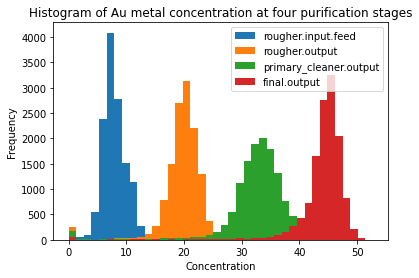

In [18]:
# Au concentration
df_train_au_con.plot(kind='hist', bins=40)
plt.title('Histogram of Au metal concentration at four purification stages')
plt.xlabel('Concentration')
plt.show()

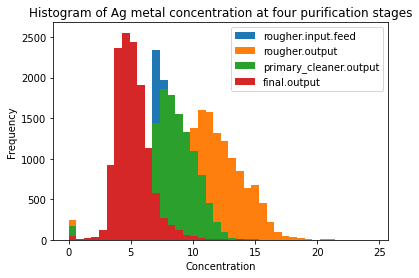

In [19]:
# Ag concentration
df_train_ag_con.plot(kind='hist', bins=40)
plt.title('Histogram of Ag metal concentration at four purification stages')
plt.xlabel('Concentration')
plt.show()

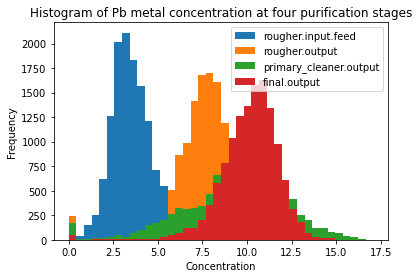

In [20]:
# Pb concentration
df_train_pb_con.plot(kind='hist', bins=40)
plt.title('Histogram of Pb metal concentration at four purification stages')
plt.xlabel('Concentration')
plt.show()

* The Au metal concentration gradually increases with the consecutive purification stages
* Ag metal concentration increases and decreases from feed input to the final output. 
* pb is in the lowest concentration. increases from input feed to primary and final output.


<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

As far as I can tell, you're looking at total concentration here, and in this task you need to check how concentrations of individual metals change throughout the process

</div>

<div class="alert alert-info">
    I misunderstood the prompt. fixed it. 
</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Excellent!

</div>

### Compare the feed particle size distributions in the training set and in the test set. If the distributions vary significantly, the model evaluation will be incorrect.

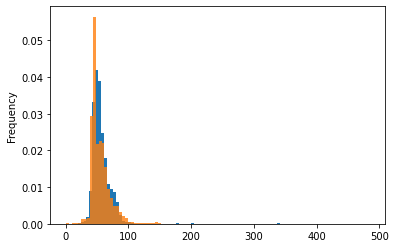

In [21]:
# rougher.input.feed_size
df_train['rougher.input.feed_size'].plot(kind='hist', bins=100, density=True)
df_test['rougher.input.feed_size'].plot(kind='hist', bins=100, alpha=0.8, density=True)

plt.show()


the distribution of the feed_size for the train and test set is similar, between 40-90. 

<div class="alert alert-warning">
<b>Reviewer's comment</b>

Alright! It would be nice to normalize the histograms as we have samples of different size (`density=True`)

</div>

<div class="alert alert-info">
    I didn't consider that. The distribution look a lot more similar now.
</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Alright!

</div>

### Consider the total concentrations of all substances at different stages: raw feed, rougher concentrate, and final concentrate. 

In [22]:
df_train_raw_feed = df_train['rougher.input.feed_au'] + df_train['rougher.input.feed_ag'] + df_train['rougher.input.feed_pb']+ df_train['rougher.input.feed_sol']
df_train_rougher_con = df_train['rougher.output.concentrate_au'] + df_train['rougher.output.concentrate_ag'] + df_train['rougher.output.concentrate_pb'] + df_train['rougher.output.concentrate_sol']
df_train_final_con = df_train['final.output.concentrate_au'] + df_train['final.output.concentrate_ag'] + df_train['final.output.concentrate_pb'] + df_train['final.output.concentrate_sol']

final_con = pd.DataFrame({'raw_feed': df_train_raw_feed, 'rougher_con': df_train_rougher_con, 'final_con': df_train_final_con})
final_con

,raw_feed,rougher_con,final_con
0,51.680034,66.42495,63.644396
1,50.659114,67.01271,63.957723
2,50.609929,66.103793,64.31118
3,51.061546,65.752751,63.573449
4,47.859163,65.908382,64.004667
...,...,...,...
16855,53.41505,70.781325,68.098589
16856,53.696482,70.539603,68.274362
16857,54.589604,55.37633,68.226068
16858,54.027355,69.201689,68.200449


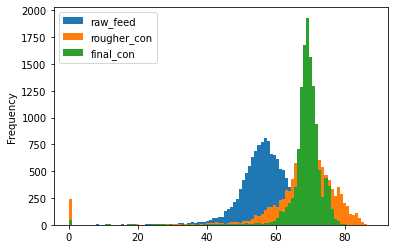

In [23]:
final_con.plot(kind='hist', bins=100)
plt.show()

The graph shows a large number of instances where concentration is zero. This may be due to zero concentration for the three stages. In which case these rows could be removed. 

In [24]:
df_train.shape

(12888, 87)

In [25]:
# removing zero concentrations 
#final_con = final_con.drop(final_con[(final_con['raw_feed'] == 0) & (final_con['rougher_con'] == 0) & (final_con['final_con'] == 0)].index)
#df_train = df_train.drop(df_train[(df_train['rougher.input.feed_au'] == 0) & (df_train['rougher.input.feed_ag'] == 0) & (df_train['rougher.input.feed_pb'] == 0) & (df_train['rougher.input.feed_sol'] == 0) & (df_train['rougher.output.concentrate_au'] == 0) & (df_train['rougher.output.concentrate_ag'] == 0) & (df_train['rougher.output.concentrate_pb'] == 0) & (df_train['rougher.output.concentrate_sol'] == 0) & (df_train['final.output.concentrate_au'] == 0) & (df_train['final.output.concentrate_ag'] == 0) & (df_train['final.output.concentrate_pb'] == 0) & (df_train['final.output.concentrate_sol'] == 0)].index)
#df_source = df_source.drop(df_source[(df_source['rougher.input.feed_au'] == 0) & (df_source['rougher.input.feed_ag'] == 0) & (df_source['rougher.input.feed_pb'] == 0) & (df_source['rougher.input.feed_sol'] == 0) & (df_source['rougher.output.concentrate_au'] == 0) & (df_source['rougher.output.concentrate_ag'] == 0) & (df_source['rougher.output.concentrate_pb'] == 0) & (df_source['rougher.output.concentrate_sol'] == 0) & (df_source['final.output.concentrate_au'] == 0) & (df_source['final.output.concentrate_ag'] == 0) & (df_source['final.output.concentrate_pb'] == 0) & (df_source['final.output.concentrate_sol'] == 0)].index)


In [26]:
# removing zero concentrations 
df_train = df_train.drop(df_train[(df_train['rougher.output.concentrate_au'] == 0) | (df_train['rougher.output.concentrate_ag'] == 0) | (df_train['rougher.output.concentrate_pb'] == 0) | (df_train['rougher.output.concentrate_sol'] == 0) | (df_train['final.output.concentrate_au'] == 0) | (df_train['final.output.concentrate_ag'] == 0) | (df_train['final.output.concentrate_pb'] == 0) | (df_train['final.output.concentrate_sol'] == 0)].index)
df_source = df_source.drop(df_source[(df_source['rougher.output.concentrate_au'] == 0) | (df_source['rougher.output.concentrate_ag'] == 0) | (df_source['rougher.output.concentrate_pb'] == 0) | (df_source['rougher.output.concentrate_sol'] == 0) | (df_source['final.output.concentrate_au'] == 0) | (df_source['final.output.concentrate_ag'] == 0) | (df_source['final.output.concentrate_pb'] == 0) | (df_source['final.output.concentrate_sol'] == 0)].index)



In [27]:
df_train.shape

(12607, 87)

Part 2:

    * The concentration of the metals was visualized with a histogram at different stages of the gold recovery process. 
    * 0 concentration rows removed from train and source sets

<div class="alert alert-success">
<b>Reviewer's comment</b>

Very well, outlliers were removed!

</div>

## Build the model

### Function to calculate the final sMAPE value.

In [28]:
import numpy as np 

In [29]:
# sMAPE 
def smape(act, predicted):
    error = abs(act - predicted)
    scale = (abs(act) + abs(predicted))/2
    smape= np.mean(error/scale)
    return smape

In [30]:
def final_smape(actual, predictions):
    rougher = smape(actual['rougher.output.recovery'], predictions['rougher.output.recovery'])
    final = smape(actual['final.output.recovery'], predictions['final.output.recovery'])
    f_smape = (0.25*rougher) + (0.75*final)
    return f_smape

<div class="alert alert-success">
<b>Reviewer's comment</b>

Functions for SMAPE calculation are correct

</div>

### Train different models. Evaluate them using cross-validation. Pick the best model and test it using the test sample. Provide findings.

In [31]:
# columns to be dropped for features set
df_test_missing.append('date')

In [32]:
# features and targets datasets
features = df_train.drop(df_test_missing, axis=1)
target = df_train[['rougher.output.recovery', 'final.output.recovery']]

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

In this project you're supposed to use cross-validation to compare the models and tune hyperparameters, not a validation set :)

The train and test sets are already given, you can use the dates to filter the source dataset
    
</div>

#### Random Forest Regressor 

In [33]:
# cross validation 
sample_size = int(len(df_train)/3)

best_model = None
best_result = 100

for est in range(10, 51, 10):
    for depth in range (1, 6):
        final_smapes = []
           
        for i in range(0, len(df_train)-1, sample_size):
            valid_indexes = range(i, i + sample_size)
            train_indexes = list(range(0, i)) + list(range(i + sample_size, len(df_train)))
    
            # Split variables features and target into samples features_train, target_train, features_valid, target_valid
            features_train = features.iloc[train_indexes]
            features_valid = features.iloc[valid_indexes]
    
            target_train = target.iloc[train_indexes]
            target_valid = target.iloc[valid_indexes].reset_index(drop=True)

            # initialize model constructor with parameters random_state=12345 and n_estimators=est
            model = RandomForestRegressor(random_state=12345, n_estimators=est, max_depth=depth)
            model.fit(features_train, target_train) # train model on training set
            predictions_valid = model.predict(features_valid) # get model predictions on validation set
            predictions_valid = pd.DataFrame({'rougher.output.recovery':predictions_valid[:,0], 'final.output.recovery':predictions_valid[:,1]})

            rfr_final_smape = final_smape(target_valid, predictions_valid)
            final_smapes.append(rfr_final_smape)
        
        rfr_final_smape_avg = sum(final_smapes) / len(final_smapes)
        if rfr_final_smape_avg < best_result:
            best_model = model
            best_result = rfr_final_smape_avg

rfr_final_smape_avg = best_result 
            
print(f'Best model: {best_model} \nAVG Final sMAPE: {best_result}')

Best model: RandomForestRegressor(max_depth=3, n_estimators=40, random_state=12345) 
AVG Final sMAPE: 0.09842821815300924


<div class='alert alert-info'>
    The cross validation and tuning hyperparameters for the Random Forest regressor takes a few minutes to process. Is that normal?
</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Yep, that's because you have to train a model for each combination of hyperparameters multiplied by the number of cross-validation folds (so in the above cell 5 * 5 * 3 = 75 models)

</div>

<div class="alert alert-info">
    fixed the order of for loops with your advice and explanation 
</div>

<div class="alert alert-success">
<b>Reviewer's comment V3</b>

Awesome!

</div>

#### linear Regression Model 


In [34]:
final_smapes = []

for i in range(0, len(df_train)-1, sample_size):
    valid_indexes = range(i, i + sample_size)
    train_indexes = list(range(0, i)) + list(range(i + sample_size, len(df_train)))
    
    # Split variables features and target into samples features_train, target_train, features_valid, target_valid
    features_train = features.iloc[train_indexes]
    features_valid = features.iloc[valid_indexes]
    
    target_train = target.iloc[train_indexes]
    target_valid = target.iloc[valid_indexes].reset_index(drop=True)

    model = LinearRegression()
    model = model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    predictions = pd.DataFrame({'rougher.output.recovery':predictions[:,0], 'final.output.recovery':predictions[:,1]})

    lr_final_smape = final_smape(target_valid, predictions)
    final_smapes.append(lr_final_smape)
    
lr_final_smape_avg = sum(final_smapes) / len(final_smapes)
print('AVG final sMAPE:', lr_final_smape_avg)

AVG final sMAPE: 0.11055163287876542


#### decision tree 

In [35]:
final_smapes = []

for i in range(0, len(df_train)-1, sample_size):
    valid_indexes = range(i, i + sample_size)
    train_indexes = list(range(0, i)) + list(range(i + sample_size, len(df_train)))
    
    # Split variables features and target into samples features_train, target_train, features_valid, target_valid
    features_train = features.iloc[train_indexes]
    features_valid = features.iloc[valid_indexes]
    
    target_train = target.iloc[train_indexes]
    target_valid = target.iloc[valid_indexes].reset_index(drop=True)

    model = DecisionTreeRegressor()
    model = model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    predictions = pd.DataFrame({'rougher.output.recovery':predictions[:,0], 'final.output.recovery':predictions[:,1]})

    rfr_final_smape = final_smape(target_valid, predictions)
    final_smapes.append(rfr_final_smape)
    
print(final_smapes)
dtr_final_smape_avg = sum(final_smapes) / len(final_smapes)
print('AVG final sMAPE:', dtr_final_smape_avg)

[0.13787660474099178, 0.13073961979096946, 0.16578371517372367]
AVG final sMAPE: 0.14479997990189497


#### sMAPE comparison

In [36]:
print('Final sMAPE')
print(f'RFR: {rfr_final_smape_avg}\n LR: {lr_final_smape_avg} \n DT: {dtr_final_smape_avg}')

Final sMAPE
RFR: 0.09842821815300924
 LR: 0.11055163287876542 
 DT: 0.14479997990189497


The Random Forest Regressor (RFR) model returned the lowest symmetric Mean Absolute Percentage Error (0.098). Thus, the RFR model will be used on the test dataset.


In [37]:
best_model

RandomForestRegressor(max_depth=3, n_estimators=40, random_state=12345)

<div class="alert alert-danger">
<S><b>Reviewer's comment</b>

1. Please add some hyperparameter tuning for at least one model
2. Please use cross-validation instead of a validation set

</div>

<div class="alert alert-info">
    I had some trouble with the cross validation. I understand the concept but I had a bit of trouble with tuning the model during cv. Let me know if this is the right way. 
</div> 

<div class="alert alert-danger">
<s><b>Reviewer's comment V2</b>

All looks good, except for hyperparameter tuning you'd want to put the loops in a different order. Like this:
    
```python
for est in range(10, 51, 10):
    for depth in range (1, 6):
        final_smapes = []
        for i in range(0, len(df_train)-1, sample_size):   
            ...
            final_smapes.append(rfr_final_smape)
        rfr_final_smape_avg = sum(final_smapes) / len(final_smapes)
        # here you'd put the logic for comparing the smape to models with different hyperparameters
```
    
The idea is to evaluate a model with each hyperparameter combination using cross-validation, compare the mean score of each and select the best.
    
By the way you could us [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) for easier splitting of the data, or even something like [cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) or [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to simplify the code (but then you'd have to slightly change your SMAPE function to implement [scoring](https://scikit-learn.org/stable/modules/model_evaluation.html#defining-your-scoring-strategy-from-metric-functions))
    
</div>

<div class="alert alert-info">
    When hypertuning models with cross validation, the best model is determined not by the RMSE but by the mean sMAPE for each hyperparameter combination. Correct?
</div>

<div class="alert alert-success">
<b>Reviewer's comment V3</b>

Well, generally you can use whatever metric you need in cross-validation, it's just that in this project our target metric is SMAPE. But yeah, you indeed calculate the mean score on all folds and determine the best model that way.

</div>

<div class='alert alert-info'>
    Is there a way to tune the hyperparameters for the decision tree or linear regression models?
</div>

<div class="alert alert-success">
<b>Reviewer's comment V3</b>

For the most basic linear regression, there are no useful hyperparameters, but there are variants like ridge regression and lasso (see [docs](https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression-and-classification)) which have hyperparameters that can be tuned.
    
For [decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) there are quite a few hyperparameters that can be tuned: max_depth, min_samples_split, min_samples_leaf and so on

</div>

<div class='alert alert-info'>
    Thanks. 
    I tried cross validation while changing the max_depth and max_leaf_nodes for the decision tree regressor below.
</div>

<div class="alert alert-success">
<b>Reviewer's comment V4</b>

Awesome!

</div>

#### max_depth and max_leaf_node decision tree (did not include in final analysis)

In [38]:
best_model = None
best_result = 100

for depth in range(1,6):
    for node in range(2,6):
        final_smapes = []

        for i in range(0, len(df_train)-1, sample_size):
            valid_indexes = range(i, i + sample_size)
            train_indexes = list(range(0, i)) + list(range(i + sample_size, len(df_train)))
    
            # Split variables features and target into samples features_train, target_train, features_valid, target_valid
            features_train = features.iloc[train_indexes]
            features_valid = features.iloc[valid_indexes]
    
            target_train = target.iloc[train_indexes]
            target_valid = target.iloc[valid_indexes].reset_index(drop=True)

            model = DecisionTreeRegressor(max_depth= depth, max_leaf_nodes=node, random_state=12345)
            model = model.fit(features_train, target_train)
            predictions = model.predict(features_valid)
            predictions = pd.DataFrame({'rougher.output.recovery':predictions[:,0], 'final.output.recovery':predictions[:,1]})

            lr_final_smape = final_smape(target_valid, predictions)
            final_smapes.append(lr_final_smape)
        lr_final_smape_avg = sum(final_smapes) / len(final_smapes)
        if lr_final_smape_avg < best_result:
            best_model = model
            best_result = lr_final_smape_avg

lr_final_smape_avg = best_result 
            
print(f'Best model: {best_model} \nAVG Final sMAPE: {best_result}')


Best model: DecisionTreeRegressor(max_depth=2, max_leaf_nodes=3, random_state=12345) 
AVG Final sMAPE: 0.09785762801308824


<div class="alert alert-info">
    I also tried using the cv function below. Let me know if I have done this correctly or if you have any suggestions.
</div>

<div class="alert alert-success">
<b>Reviewer's comment V4</b>

All looks great, well done!
    
Note that if you use your custom scoring with `GridSearchCV` (which basically does the same thing you did manually below) you need to correctly set `greater_is_better` parameter of `make_scorer`. By default it is `True`, which means `GridSearchCV` will select the model with the biggest score. For error functions like SMAPE you'd want to select the model with the lowest score. Setting `greater_is_better=False` will flip the sign of the score (e.g. it will return -1 instead of 1) which will result in `GridSearchCV` selecting the model with lowest error 

</div>

In [39]:
# sMAPE2 (same as smape function)
def smape2(act, predicted):
    error = abs(act - predicted)
    scale = (abs(act) + abs(predicted))/2
    smape= np.mean(error/scale)
    return smape

In [40]:
# actual dataframe turned into an array (nested lists)
def final_smape2(actual, predictions):
    actual = actual.values
    rougher = smape2(actual[:,0], predictions[:,0])
    final = smape2(actual[:,1], predictions[:,1])
    f_smape = (0.25*rougher) + (0.75*final)
    return f_smape

In [41]:
best_model2 =None
best_result2 =100

for est in range(10, 51, 10):
    for depth in range (1, 6):
        model2 = RandomForestRegressor(random_state=12345, n_estimators=est, max_depth=depth)
        score = make_scorer(final_smape2)
        cross_val_scores = cross_val_score(model2, features, target, cv=3, scoring=score)
        if cross_val_scores.mean() < best_result2:
            best_model2 = model2
            best_result2 = cross_val_scores.mean()


In [42]:
# final sMAPE with cross_val_score function 
print(f"{best_model2}\n\n{best_result2}")

RandomForestRegressor(max_depth=3, n_estimators=40, random_state=12345)

0.09831412716140531


#### Test set

In [43]:
test_set = df_source.query("date in @df_test['date']").reset_index(drop=True)

In [44]:
# test the RFR model using test set
features_test = test_set.drop(df_test_missing, axis=1).astype(float)
target_test = test_set[['rougher.output.recovery', 'final.output.recovery']].astype(float)

In [45]:
predictions = best_model.predict(features_test)
predictions = pd.DataFrame({'rougher.output.recovery':predictions[:,0], 'final.output.recovery':predictions[:,1]})
final_smape_test_set = final_smape(target_test, predictions)
final_smape_test_set

0.07448813187102514

The source dataframe was filtered for dates in the test dataframe. 
This filtered data was used to make the features and targets dataset. 
Targets were predicted with the best RFR model. 
The final sMAPE was 0.074

The final sMAPE on the test set and the final sMAPE from RGR cross validation was about 0.0745. Thus, the best RFR model from tuning will allow us to predict the targets with a 7.4% error (sMAPE). 

#### Dummy Regressor 

In [46]:
from sklearn.dummy import DummyRegressor

In [47]:
model = DummyRegressor(strategy="median")
model.fit(features, target)
predictions = model.predict(features_test)
predictions = pd.DataFrame({'rougher.output.recovery':predictions[:,0], 'final.output.recovery':predictions[:,1]})

In [48]:
constant_model_final_smape = final_smape(target_test, predictions)
constant_model_final_smape

0.07577046612591155

<div class="alert alert-danger">
<S><b>Reviewer's comment</b>

Please evaluate the final model using SMAPE on the test set and compare the results to some simple baseline (e.g. a constant model using [DummyRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html))

</div>

<div class='alert alert-info'>
    I am unclear on what you mean by "compare the results to some simple baseline (e.g. a constant model using DummyRegressor)"
</div>

<div class="alert alert-danger">
<s><b>Reviewer's comment V2</b>

Alright, the final model is evaluated on the test set correctly!
    
What I meant by that is to create a constant model (which would always predict mean or median of training targets; this can be done using DummyRegressor) and evaluate it on the test set as well. By comparing our final model to this constant model we can check if it actually learned something useful :)

</div>

<div class='alert alert-info'>
    I train the dummy regressor model with the train set and tried to get the final sMAPE for the test set. However I am getting the error: "TypeError: 'numpy.float64' object is not callable". 
    I thought there was an issue with the smape functions but none of the other models had any issue. I changed the order of the sections in the notebook, running the DummyRegressor and then the test set with the best_model and I didn't get an error for the DummyRegressor but I got the same error for the best_model. I am not sure what the issue is, hope you can help. 
    
</div>

<div class="alert alert-danger">
<s><b>Reviewer's comment V3</b>

The issue is that you're overwriting the `final_smape` function with a `final_smape` variable containing the final smape value for the DummyRegressor, so after running this cell once you can no longer call the function. Just use a different variable name :)

</div>

<div class="alert alert-info">
WOW. Spent hours thinking it was an issue with the function or something else, only to find out it was a simple overwriting issue. Lesson learned. Thanks. 
</div>

<div class="alert alert-success">
<b>Reviewer's comment V4</b>

Haha, yeah, it can be hard to debug such issues!

</div>

<div class= 'alert alert-info'>
    The final sMAPE for the final model is 0.074488. And 0.07577 for the constant model. The difference is only 0.1282%. Is that ok? It seems a bit to close. 
    
</div>

<div class="alert alert-success">
<b>Reviewer's comment V4</b>

Well, strictly speaking it is 0.1282 percentage points, or 1.69% difference, that is also not very much of a difference though :)
    
In this project there are no requirements on the score, but you are right to be vary of results not beating the dummy model by much. There could be several reasons for this: maybe data quality is poor, and the model learns noise, maybe there is some crucial parameter which determines the outcome of the process which was not measured

</div>

## Conclusion

* The datasets was reviewed and cleaned 
* The concentrations of metals were viewed with histogram plots and 0 values for concentrations were removed from the test and source sets. 
* 3 ml models were trained and fited with test and train sets of the source dataset (df_source)
* the Random Forest Regressor (RFR) models parameters were tuned for the best model. 
* RFR model returned the lowest AVG sMAPE (0.098%), thus RFR best_model was used to predict the targets on the test set. 
* The sMAPE on the test set with the best_model was 0.074.  
* 7.4% sMAPE in predicting the targets, 'rougher.output.recovery' and 'final.output.recovery'

In [53]:
print(f"Random Forest Regressor best model: {best_model}")

Random Forest Regressor best model: DecisionTreeRegressor(max_depth=2, max_leaf_nodes=3, random_state=12345)


<div class="alert alert-success">
<b>Reviewer's comment</b>

Please check the conclusion after fixing the problems above

</div>

<div class="alert alert-info">
    Thanks for all the feedback Dmitry!
</div>

<div class="alert alert-success">
<b>Reviewer's comment V4</b>

You're welcome! :)
    
The project is accepted! Keep up the good work on the next sprint!

</div>